Талавер Олег ПІ-60[2]
Репозиторій: https://gitlab.com/bachelors2022/pi-60/talaver-oleg/other/ai.git

# ДОСЛІДЖЕННЯ МЕТОДІВ НЕКОНТРОЛЬОВАНОГО НАВЧАННЯ

## Кластеризація даних за допомогою методу k-середніх

Побудувати регресійну модель на основі однієї змінної. Використовувати файл вхідних даних: data_singlevar_regr.txt

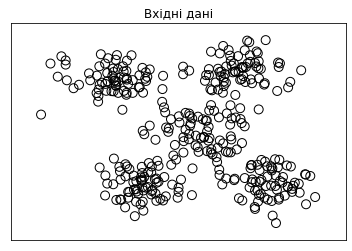

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
from sklearn.cluster import KMeans

# Завантаження вхідних даних
X = np.loadtxt('data_clustering.txt', delimiter=',')
num_clusters = 5

# Включення вхідних даних до графіка
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none', edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Вхідні дані')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

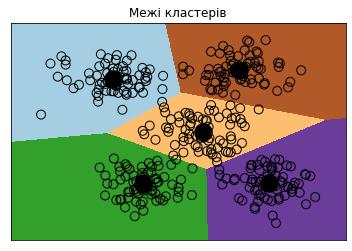

In [2]:
# Створення об'єкту КМеаns
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Навчання моделі кластеризації КМеаns
kmeans.fit(X)

# Визначення кроку сітки
step_size = 0.01

# Відображення точок сітки
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(
    np.arange(x_min, x_max, step_size),
    np.arange(y_min, y_max, step_size)
)

# Передбачення вихідних міток для всіх точок сітки
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Графічне відображення областей та виділення їх кольором
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest', extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower')

# Відображення вхідних точок
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none', edgecolors='black', s=80)

# Відображення центрів кластерів
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=210, linewidths=4, color='black', zorder=12,
            facecolors='black')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Межі кластерів')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Алгоритм k-mean зміг знайти центри кластерів, використання ++ версії дозволило пришвидшити процес

## Кластеризація K-середніх для набору даних Iris

Виконайте кластеризацію K-середніх для набору даних Iris, який
включає три типи (класи) квітів ірису (Setosa, Versicolour і Virginica) з
чотирма атрибутами: довжина чашолистка, ширина чашолистка, довжина
пелюстки та ширина пелюстки. У цьому завданні використовуйте
sklearn.cluster.KMeans для пошуку кластерів набору даних Iris.

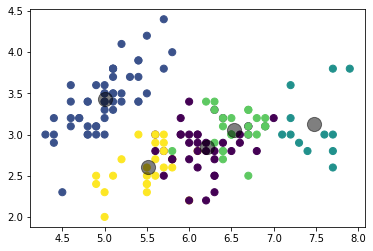

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# load iris db
iris = load_iris()
X = iris['data']
y = iris['target']

"""
    Create but not not assign to a var
    Params:
        n_clusters - 8 clusters to find
        init - ++ version of algorithm
        n_init -
        max_iter - max 300 steps to find cluster centres
        tol - as I understood, means smallest change in centroid position to say it's still changing, default value is used
        verbose - turn off
        random_state - default value, random state for centroid generation
        copy_x - do not mutate original data (default value)
        algorithm - what centring algorithm to use (default value)
"""
sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None,
                copy_x=True, algorithm='auto')

# Create and assign algo object with clusters number specified
kmeans = KMeans(n_clusters=5)

# Train
kmeans.fit(X)

# Predict
y_kmeans = kmeans.predict(X)

# Draw diagram with sizes of sepal part of irises with predicted centroids
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

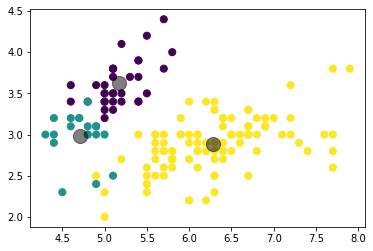

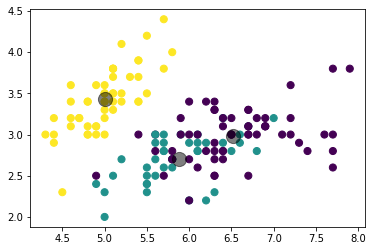

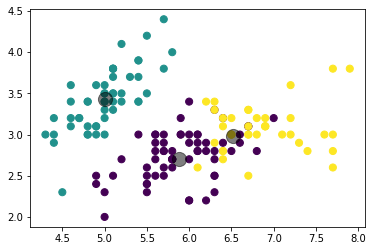

In [4]:
"""
Custom clusters search algorithm
Picks n_clusters random points from X and makes them cluster centers
Repeat:
    Finds to which cluster a point from X belongs to
    Alternates centers by finding mean between points that belong to the cluster
"""
def find_clusters(X, n_clusters, rseed=2):
    # create new random sequence generator with te given seed
    # create a random array with the length of rows of X and select n numbers
    # get rows from X
    rnd = np.random.RandomState(rseed)
    i = rnd.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # Retrieve array with centers index with the smallest distance to any other center in X
        labels = pairwise_distances_argmin(X, centers)

        # For each cluster, filter points from X that belong to that cluster and find mean between respective coordinates - this is now new center for the cluster
        new_centers = np.array([X[labels == cluster_number].mean(0) for cluster_number in range(n_clusters)])
        # finish if centers haven't changed
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers

        return centers, labels


# use custom function to find centers
centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

# use custom function to find centers with non default seed
centers, labels = find_clusters(X, 3, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

# use sklearn to compare
labels = KMeans(3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## Оцінка кількості кластерів з використанням методу зсуву середнього

Відповідно до рекомендацій, напишіть програму та оцініть максимальну
кількість кластерів у заданому наборі даних за допомогою алгоритму зсуву
середньою. Для аналізу використовуйте дані, які містяться у файлі
data_clustering.txt.

Centers [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]
Number of clusters 5


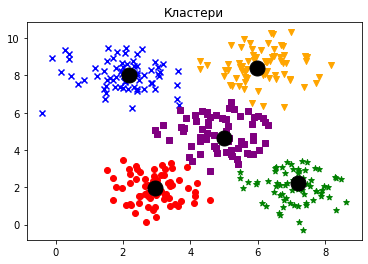

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Завантаження
X = np.loadtxt('data_clustering.txt', delimiter=',')

# Оцінка ширини вікна для Х
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# Кластеризація даних методом зсуву середнього
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Витягування центрів кластерів
cluster_centers = meanshift_model.cluster_centers_
print("Centers", cluster_centers)

# Оцінка кількості кластерів
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("Number of clusters", num_clusters)

# Відображення на графіку точок та центрів кластерів
plt.figure()
markers = 'o*xvs'
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
for i, marker in zip(range(num_clusters), markers):
    # Відображення на графіку точок, які належать поточному кластеру
    plt.scatter(X[labels == i, 0], X[labels == i, 1], marker=marker, color=colors[i])

    # Відображення на графіку центру кластера
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', markerfacecolor='black', markeredgecolor='black',
             markersize=15)

plt.title('Кластери')
plt.show()

Даний метод допомагає знайти кластери, навіть якщо невідома їх кількість

## Знаходження підгруп на фондовому ринку з використанням моделі поширення подібності

Використовуючи модель поширення подібності, знайти підгрупи серед учасників фондового ринку. У якості керуючих ознак будемо використовувати варіацію котирувань між відкриттям і закриттям біржі. Використовувати файл вхідних даних фондового ринку, що доступний в бібліотеці matplotlib. Прив'язки символічних позначень компаній до повних назв містяться у файлі company_symbol_mapping.json.

Matplotlib finances was deprecated
https://github.com/matplotlib/matplotlib/issues/8667#issuecomment-304435887